# Student Details
* Guy Kabiri

# Summarization

## PyTorch Dataloders
A big effort in machine learning is focusing on preparing the data.  
In order to make this part easier, `PyTorch` provided an API to load and handling the data before using it with our algorithms.  
`PyTorch`'s `Dataset` class provides a unified way to represent a dataset. All that needs to be done is to create a class that inherits from `Dataset` and overrides the `__len__` method that returns the size of the dataset, and the `__getitem__` method that returns a specific item from the dataset by an index.  
By self-implementing `__getitem__`, we may perform some transformations on the data before returning it back. This might be useful for example when handling a dataset that contains some ununiform size of images.

## Albumentations' Image Augmentation for Classification
`Albumations`' image augmentation for classification provides a way to define an augmentation pipeline in which the data will pass through.  
This process is done by calling to `Compose` class of `Albumentations`, which gets all the transform functions to load into the pipeline, and returns a callable object, that by calling it, will return an augmented image. Each transform function provided to the pipeline has a probability attribute to determine if the current image should be processed by that transform or not. In that way, we can create a bunch of different augmented images and increase our dataset's size.

# Imports

In [57]:
import random
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
import cv2
import albumentations as A

In [58]:
!wget https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL -O monkey.jpg

--2021-04-03 15:53:34--  https://media.pri.org/s3fs-public/styles/open_graph/public/photos/2014-July/india_new_delhi_monkeys.jpg?itok=u1PJ8xjL
Resolving media.pri.org (media.pri.org)... 13.225.62.92, 13.225.62.91, 13.225.62.117, ...
Connecting to media.pri.org (media.pri.org)|13.225.62.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426010 (416K) [image/jpeg]
Saving to: ‘monkey.jpg’

monkey.jpg          100%[===================>] 416.03K  --.-KB/s    in 0.03s   

2021-04-03 15:53:35 (14.8 MB/s) - ‘monkey.jpg’ saved [426010/426010]



In [59]:
img_monkey = cv2.imread('monkey.jpg')
img_monkey = cv2.cvtColor(img_monkey, cv2.COLOR_BGR2GRAY)

# Defining the Augmentations

In [84]:
# ID = 312252224 -> 0.4, 0.2, 0.2
transform = A.Compose([
                       A.Flip(      p=0.4),
                       A.Rotate(    p=0.2),
                       A.Blur(      p=0.2),
])

# Display Samples

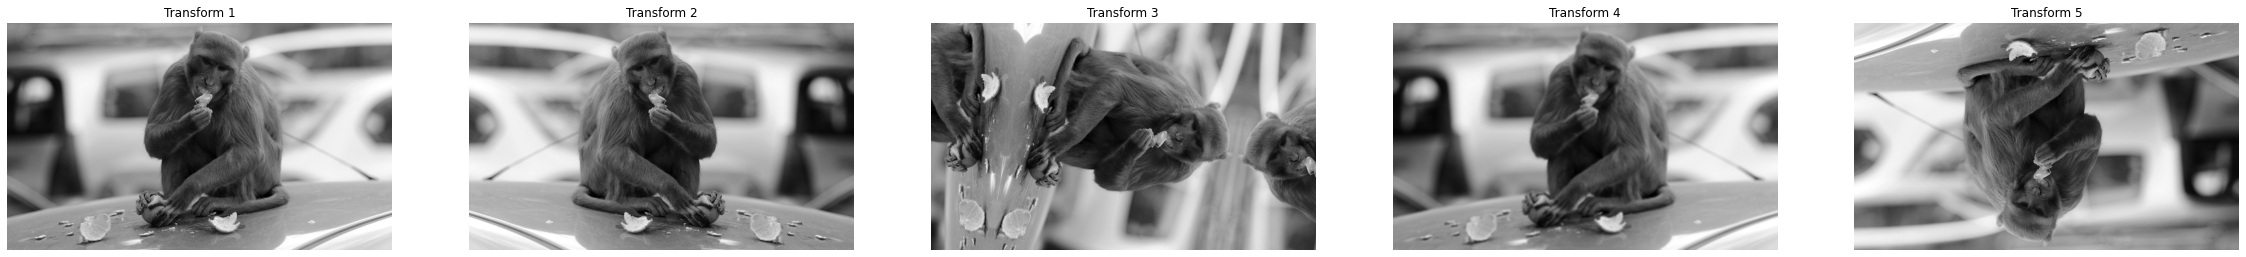

In [85]:
plt.figure(figsize=(40, 30))

for index in range(5):
    plt.subplot(1, 5, index + 1)
    transformed_img = transform(image=img_monkey)['image']
    plt.title('Transform {}'.format(index + 1))
    plt.axis("off")
    plt.imshow(transformed_img, cmap='gray')

plt.show()